In [1]:
### Decision Trees ###

# References
# Chapter 2: DecisionTreeRegressor
# Chapter 7: Random Forests 

In [2]:
## Training and Visualizing a Decision Tree ##

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [3]:
import os

print(os.path.dirname(os.path.realpath("chapter6_decision-trees")))

C:\Users\admin\OneDrive\Desktop\machine_learning\Hands-on_ML\chapter6_decision-trees


In [4]:
import os

# Where to save the figures
PROJECT_ROOT_DIR = os.path.dirname(os.path.realpath("chapter6_decision-trees"))
CHAPTER_ID = "chapter6_decision-trees"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", fig_id)

from sklearn.tree import export_graphviz

# Create visualization of the decision tree.
export_graphviz(
    tree_clf,
    out_file=image_path('iris_tree.dot'),
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

# Convert .dot file to variety of formats using the command-line tool from graphviz package.

# Nodes "gini" attribute measures its impurity. "0" is pure
# If all training instances belong in the same class, it's gini score is 0. 

# Example: dot -Tpng iris_tree.dot -o iris_tree.png

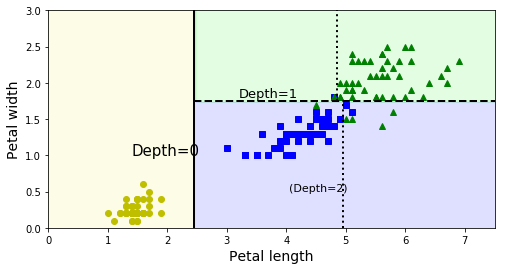

In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
# Plot data
plot_decision_boundary(tree_clf, X, y)
# Decision boundaries.
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

In [6]:
## Estimating Class Probabilities ##


tree_clf.predict_proba([[5,1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [7]:
tree_clf.predict([[5,1.5]])

array([1])

In [ ]:
## The CART Training Algorithm ##

# Scikit-learn uses the classification and regression tree (CART) algotithm to train decision trees
# (also called "growing trees").

# Splits the data into two subsets using a singe feature "k".
# has a threshold tk.
# Once it has split the training set in two it splits the subsets using the same logic until
# reaches the msximum depth (definded by the max_depth hyperparameter)
# If it can't reach a depth using impurity it uses other hyperparamters listed below.
# min_samples_split, min_samples_leaf, min_weight_fraction_leaf, and max_leaf_nodes

In [ ]:
## Computational Complexity ##

# Predictions are very fast when traversing the decision tree.

# Training takes a while.
# Scikit-Learn can speed up training by presorting the data (set presort=True)

In [ ]:
## Gini Impority or Entropy? ##

# Default is Gini impurity.
# Can measure entropy impurity measure instead by setting the criterion hyperparameter to "entropy".
# Measure of disorder

# For the most part gini and entropy lead to similar trees. Gini is quicker to compute.
# Gini impurity tends to isolate the most frequent class in its own branch of the tree.
# Entropy tends ot produce slightly more balanced trees. 

In [ ]:
## Regularization Hyperparameters ##

# Unlike regression decision trees have very litlle assumption. 
# If left unconstrained, the tree structure will adapt itself to the training data, fitting it
# very cloself, and most likely overfitting it. Such a model is often called a nonparametricmodel,
# not because it does not determined prior to training, so the model structure is free to stick closely to the data. 
# In contrast a parametric model have predetermined number of parameters (such as linear model).

# Can limit and control overfitting.
# One way to do it is to control the max_depth hyperparamter. This controls the depth of the tree.
# Other Methods
# min_samples_split: the minimum number of samples a leaf node must have.
# min_weigth_fraction_leaf: same as min_samples_leaf bt expressed as a fraction of the total 
# number of weighted instances.
# mx_leaf_nodes: meximum number of leaf nodes
# max_features: maximum number of features that are evaluated for splitting at each node. 
# incrasing min_* hyperparameters or reducing max_*hyperparameters will regularize the model. 


In [8]:
## Regression ##

# Decision trees can also do regression tasks. 

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X,y)

# The result of the above model is insteady of predicting a class in each node
# it predicts a value. 

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [ ]:
## Exercises

# 1. What is the approximate depth of a Decision Tree trained (without retrictions) on a 
# training set with 1 million instances.
# A: The depth should set to a level that maximizes impurity.

# Book A: The depth of a well-balanced tree containing m leaves is equal to log**2(m)**2, rounded up.
# A binary decision tree (one that makes only bindary decisions, as is the case of all trees in Scikit-Learn)
# will end upmore or less well balanced at the end of training, with one leaf per training instance if it is trained
# without restrictions. Thus, if the trainig set contains one million instances, the Decision Tree will
# have a depth of log**2(10**6) ≈ 20 (actually a bit more since the tree will generally not be perfectly well
# balanced).

# 2. Is a node's Gini impurity generally lower or greater than its parent's? Is it generally lower/greater
#, or always lower/greater?
# A: Generally the Gini impurity is greater than the parent. As data is split into classes it becomes
# more difficult to make the split pure.

# Book A: A node's Gini impurity is generally lower than its parent's. This is due to the CART
# training algorithm's cost function, which splits each node in a way taht minimizes the weighted sum
# of its children's GIni imputiries... ***More to the answer in the book***

# 3. If a Decision Tree is overfitting the training set, is it a good ide to try decreasing max_depht?
# A: Yes, by decreasing max depth you allowing the data to generalize the classification more. 

# Book A: If a decision tree is overfitting the training set, it may be a good idea to decrease max_depth,
# since this will constrain the model, regularizing it. 